In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [2]:
data=pd.read_csv(r'C:\Users\rashi\Downloads\Dataset2-main\Dataset2-main\temperature.csv')

In [3]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
data.shape

(7752, 25)

there are 7752 rows and 25 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


there are 24 float type data and 1 object type data

In [6]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

there are many null values in our dataset

In [7]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


there are 24 columns so all are not getting displayed here. we will check for outliers and skewness separately in further steps

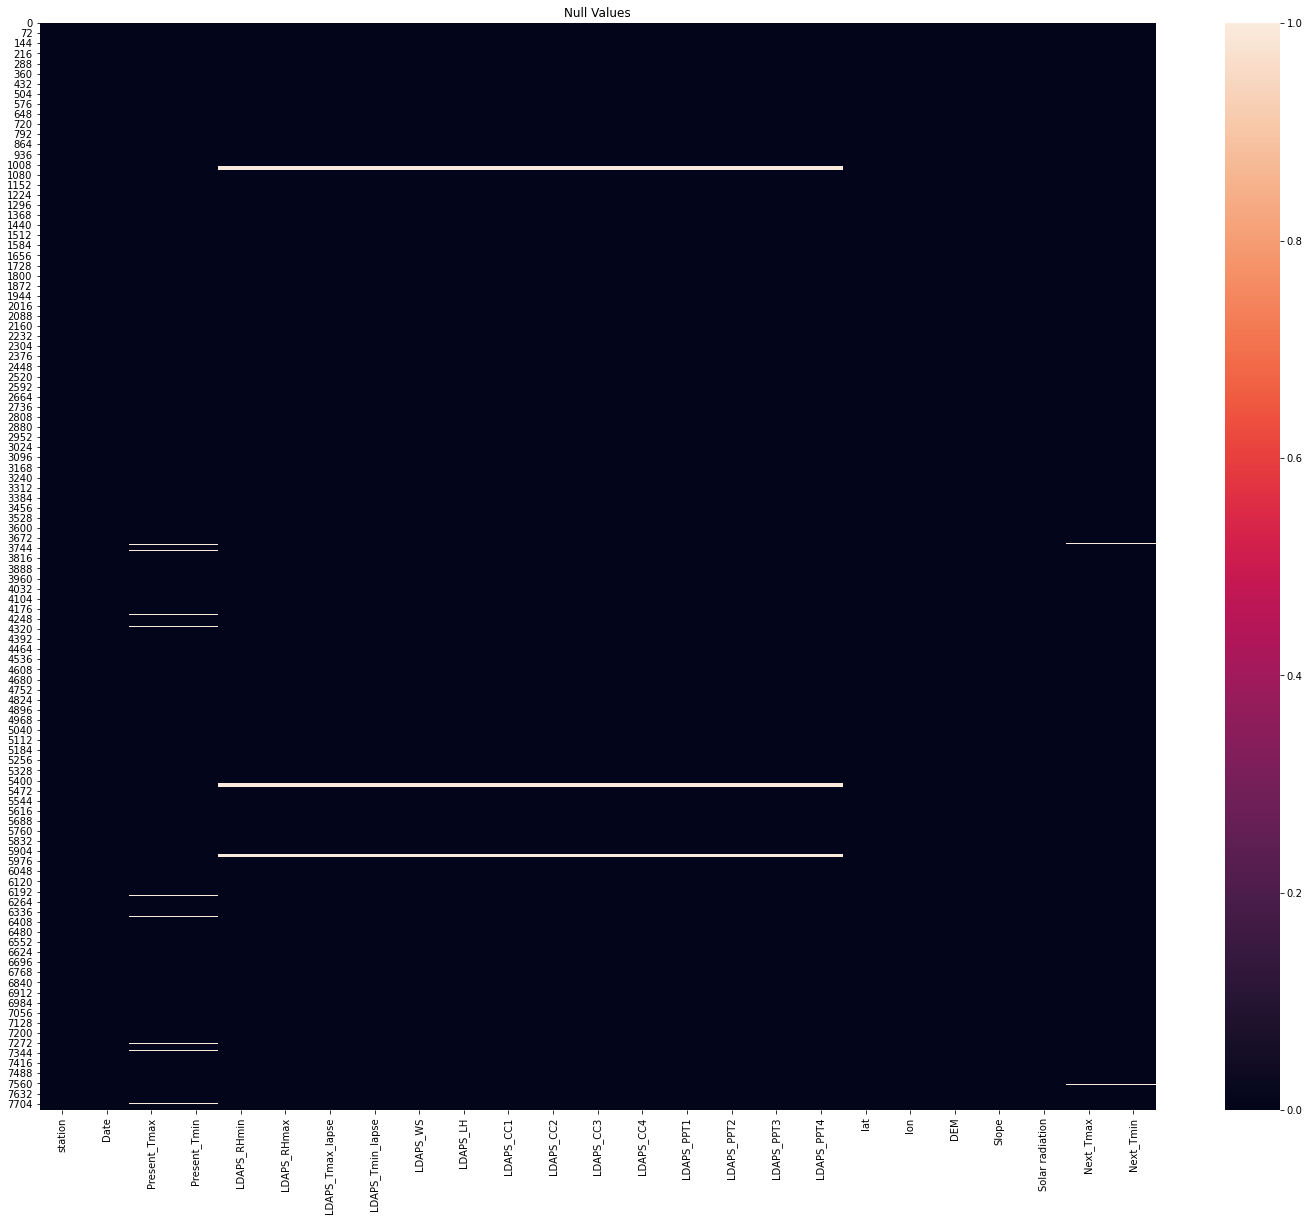

In [9]:
plt.figure(figsize=[25,20])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

there is no values in the dataset

# eda

In [10]:
data['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

these are the value count next tmax

In [11]:
data['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

these are the value count for next tmin

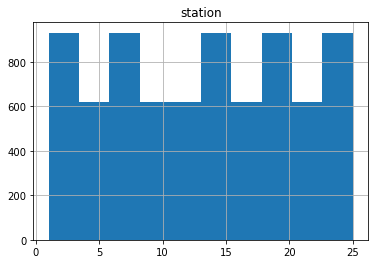

In [12]:
data['station'].hist(grid=True)              #univariate analysis
plt.title('station')
plt.show()

data iss imbalance

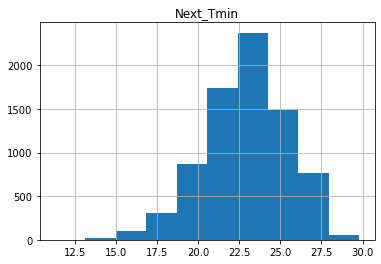

In [13]:
data['Next_Tmin'].hist(grid=True)
plt.title('Next_Tmin')
plt.show()

data is imbalance

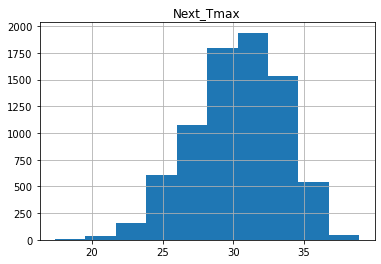

In [14]:
data['Next_Tmax'].hist(grid=True)
plt.title('Next_Tmax')
plt.show()

target variables have class imbalace problem

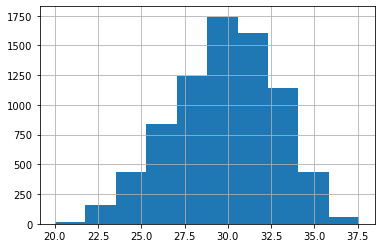

In [15]:
data['Present_Tmax'].hist(grid=True)
plt.show()

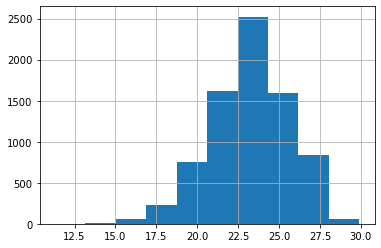

In [16]:
data['Present_Tmin'].hist(grid=True)
plt.show()

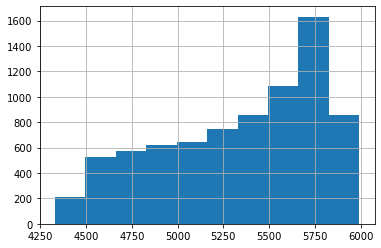

In [17]:
data['Solar radiation'].hist(grid=True)
plt.show()

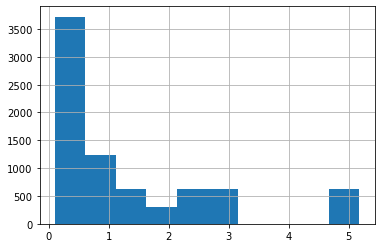

In [18]:
data['Slope'].hist(grid=True)
plt.show()

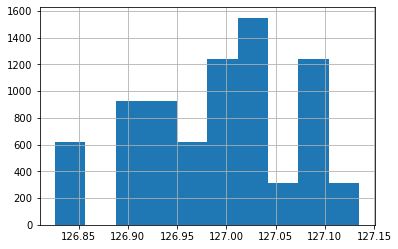

In [19]:
data['lon'].hist(grid=True)
plt.show()

data is imbalance

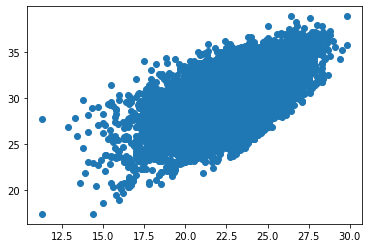

In [20]:
plt.scatter(data['Next_Tmin'],data['Next_Tmax'])       #bivariate analysis
plt.show()

this the relation between the target variables 

In [21]:
corr_mat=data.corr()           #multivariate analysis
corr_mat

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


this shows the correlation between rows and columns

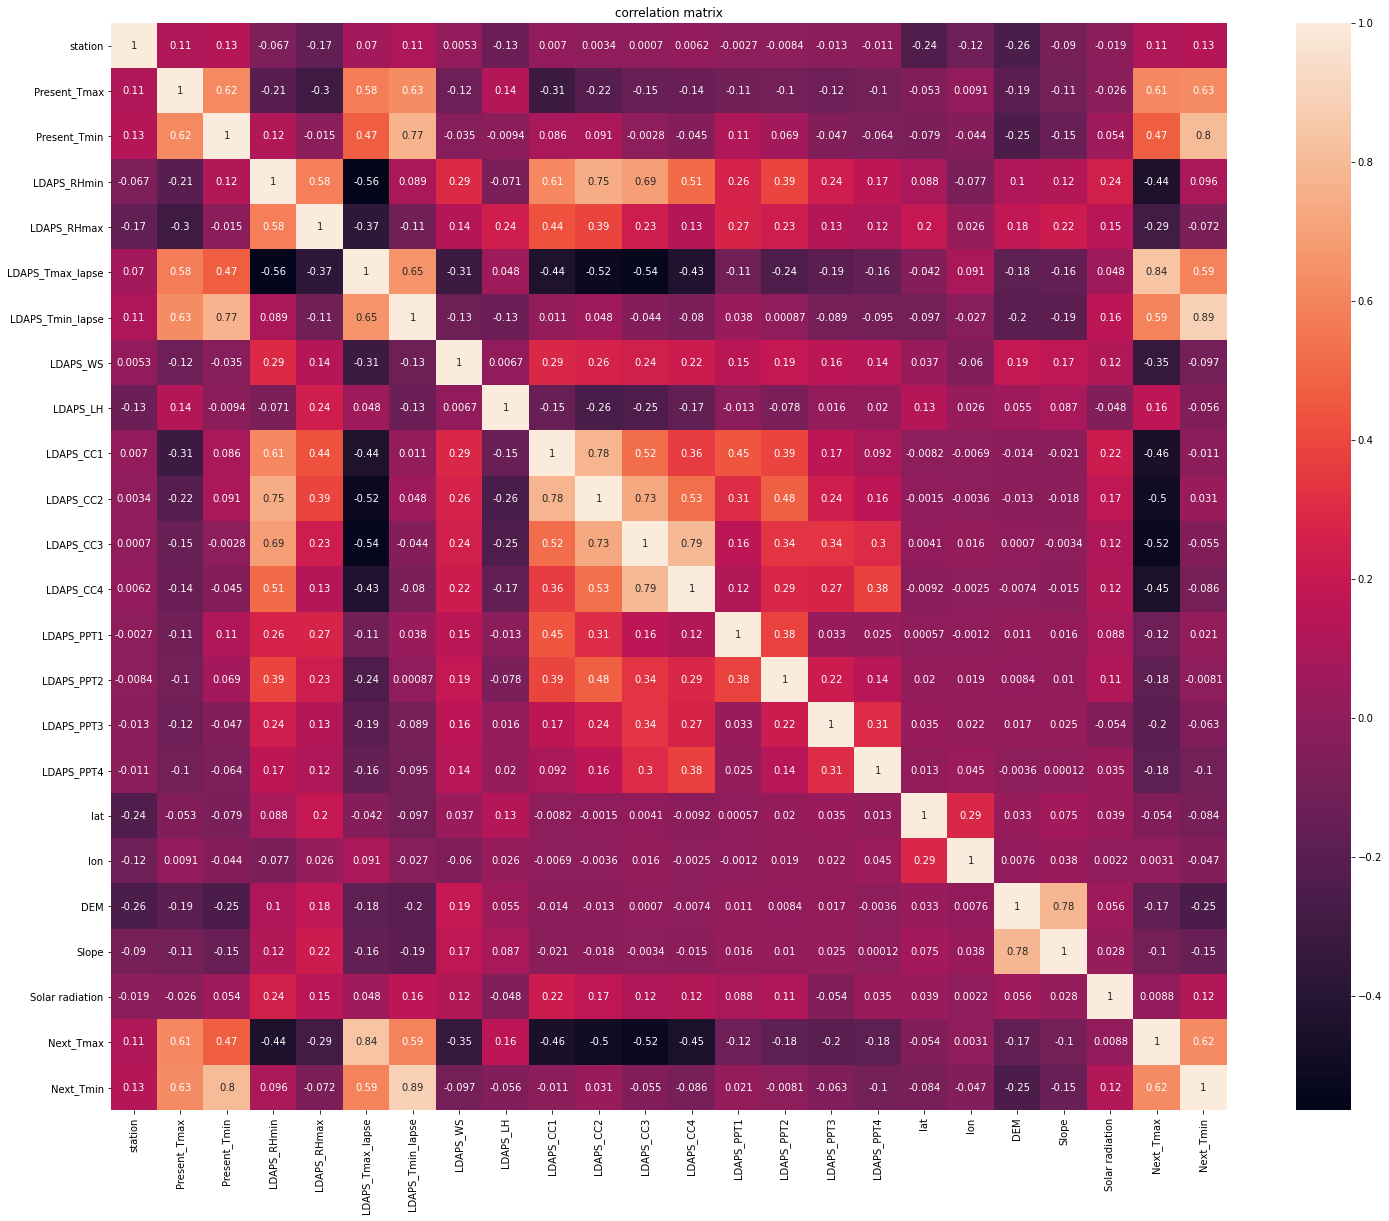

In [22]:
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title('correlation matrix')
plt.show()

we observe that our target variable is having agood relation with all the other columns

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
LE=LabelEncoder()
data['Date']=LE.fit_transform(data['Date'])

In [79]:


data['Next_Tmax'] = LE.fit_transform(data['Next_Tmax'])
data['Next_Tmin'] = LE.fit_transform(data['Next_Tmin'])
data['station'] = LE.fit_transform(data['station'])
data['Present_Tmax'] = LE.fit_transform(data['Present_Tmax'])
data['Present_Tmin'] = LE.fit_transform(data['Present_Tmin'])
data['LDAPS_RHmin'] = LE.fit_transform(data['LDAPS_RHmin'])
data['LDAPS_RHmax'] = LE.fit_transform(data['LDAPS_RHmax'])
data['LDAPS_Tmax_lapse'] = LE.fit_transform(data['LDAPS_Tmax_lapse'])
data['LDAPS_Tmin_lapse'] = LE.fit_transform(data['LDAPS_Tmin_lapse'])
data['LDAPS_WS'] = LE.fit_transform(data['LDAPS_WS'])
data['LDAPS_LH'] = LE.fit_transform(data['LDAPS_LH'])
data['LDAPS_CC1'] = LE.fit_transform(data['LDAPS_CC1'])
data['LDAPS_CC2'] = LE.fit_transform(data['LDAPS_CC2'])
data['LDAPS_CC3'] = LE.fit_transform(data['LDAPS_CC3'])
data['LDAPS_CC4'] = LE.fit_transform(data['LDAPS_CC4'])
data['LDAPS_PPT1'] = LE.fit_transform(data['LDAPS_PPT1'])
data['LDAPS_PPT2'] = LE.fit_transform(data['LDAPS_PPT2'])
data['LDAPS_PPT3'] = LE.fit_transform(data['LDAPS_PPT3'])
data['LDAPS_PPT4'] = LE.fit_transform(data['LDAPS_PPT4'])
data['lat'] = LE.fit_transform(data['lat'])
data['lon'] = LE.fit_transform(data['lon'])
data['DEM'] = LE.fit_transform(data['DEM'])
data['Slope'] = LE.fit_transform(data['Slope'])
data['Solar radiation'] = LE.fit_transform(data['Solar radiation'])


we have encoded all our float data into int type

In [80]:
data.dtypes

station             int64
Date                int32
Present_Tmax        int64
Present_Tmin        int64
LDAPS_RHmin         int64
LDAPS_RHmax         int64
LDAPS_Tmax_lapse    int64
LDAPS_Tmin_lapse    int64
LDAPS_WS            int64
LDAPS_LH            int64
LDAPS_CC1           int64
LDAPS_CC2           int64
LDAPS_CC3           int64
LDAPS_CC4           int64
LDAPS_PPT1          int64
LDAPS_PPT2          int64
LDAPS_PPT3          int64
LDAPS_PPT4          int64
lat                 int64
lon                 int64
DEM                 int64
Slope               int64
Solar radiation     int64
Next_Tmax           int64
Next_Tmin           int64
dtype: object

In [81]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,290,80,73,4445,4440,2281,2868,4328,4818,...,0,0,0,9,11,24,23,1574,92,75
1,1,290,112,75,3258,4181,3984,4228,1943,3348,...,0,0,0,9,16,11,10,1531,106,88
2,2,290,109,92,2472,1848,4243,5013,2957,733,...,0,0,0,8,19,9,6,1517,112,102
3,3,290,113,93,4441,6943,3839,3267,1869,4568,...,0,0,0,11,14,12,21,1500,118,106
4,4,290,107,78,4047,3993,3253,3465,2037,6845,...,0,0,0,7,24,10,9,1510,113,88


we have encoded the date column as it was in object type

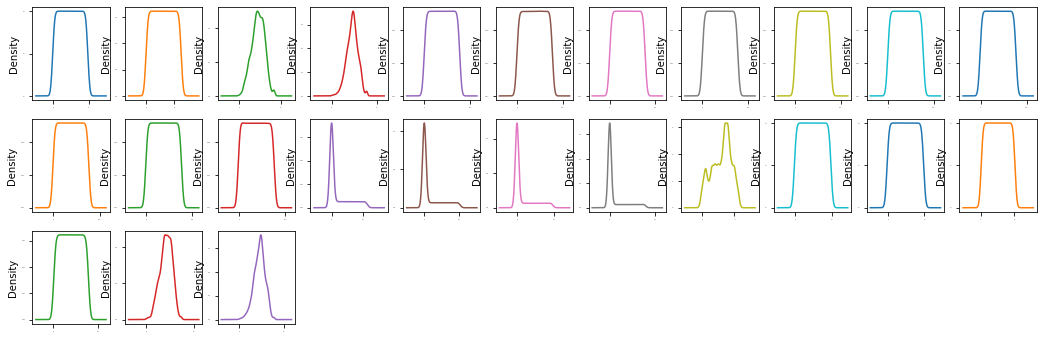

In [82]:
data.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1, figsize=(18,12))
plt.show()

we can see the skewness in data for multiple columns , we will treat them

In [83]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,290,80,73,4445,4440,2281,2868,4328,4818,...,0,0,0,9,11,24,23,1574,92,75
1,1,290,112,75,3258,4181,3984,4228,1943,3348,...,0,0,0,9,16,11,10,1531,106,88
2,2,290,109,92,2472,1848,4243,5013,2957,733,...,0,0,0,8,19,9,6,1517,112,102
3,3,290,113,93,4441,6943,3839,3267,1869,4568,...,0,0,0,11,14,12,21,1500,118,106
4,4,290,107,78,4047,3993,3253,3465,2037,6845,...,0,0,0,7,24,10,9,1510,113,88


# as we have two target variables will test everything twice

In [84]:
x=data.drop('Next_Tmax',axis=1)
y=data['Next_Tmax']

In [85]:
x.skew()

station             0.000115
Date                0.000008
Present_Tmax       -0.163930
Present_Tmin       -0.232307
LDAPS_RHmin        -0.001296
LDAPS_RHmax        -0.001909
LDAPS_Tmax_lapse   -0.000949
LDAPS_Tmin_lapse   -0.000949
LDAPS_WS           -0.000949
LDAPS_LH           -0.000949
LDAPS_CC1           0.000944
LDAPS_CC2           0.000523
LDAPS_CC3           0.000079
LDAPS_CC4           0.003226
LDAPS_PPT1          1.367226
LDAPS_PPT2          1.535114
LDAPS_PPT3          1.629611
LDAPS_PPT4          1.943167
lat                -0.343742
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000236
Next_Tmin          -0.339388
dtype: float64

our data has skewness 

In [86]:
from sklearn.preprocessing import power_transform
data_new=power_transform(x)
data_new=pd.DataFrame(data_new,columns=x.columns)

In [87]:
data_new.skew()

station            -0.242671
Date               -0.282795
Present_Tmax       -0.079709
Present_Tmin       -0.020135
LDAPS_RHmin        -0.292346
LDAPS_RHmax        -0.292467
LDAPS_Tmax_lapse   -0.292258
LDAPS_Tmin_lapse   -0.292258
LDAPS_WS           -0.292258
LDAPS_LH           -0.292258
LDAPS_CC1          -0.383387
LDAPS_CC2          -0.373286
LDAPS_CC3          -0.358893
LDAPS_CC4          -0.406827
LDAPS_PPT1          0.540055
LDAPS_PPT2          0.713496
LDAPS_PPT3          0.800622
LDAPS_PPT4          1.112221
lat                -0.267235
lon                -0.242825
DEM                -0.242825
Slope              -0.204733
Solar radiation    -0.261711
Next_Tmin          -0.044806
dtype: float64

now our data is skewed

In [88]:
x=data_new

# checking outliers

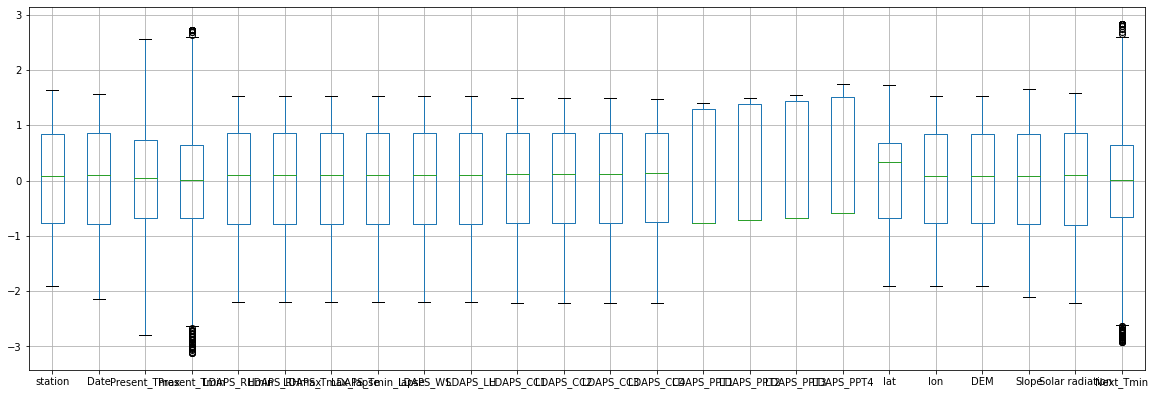

In [89]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

data contains outliers

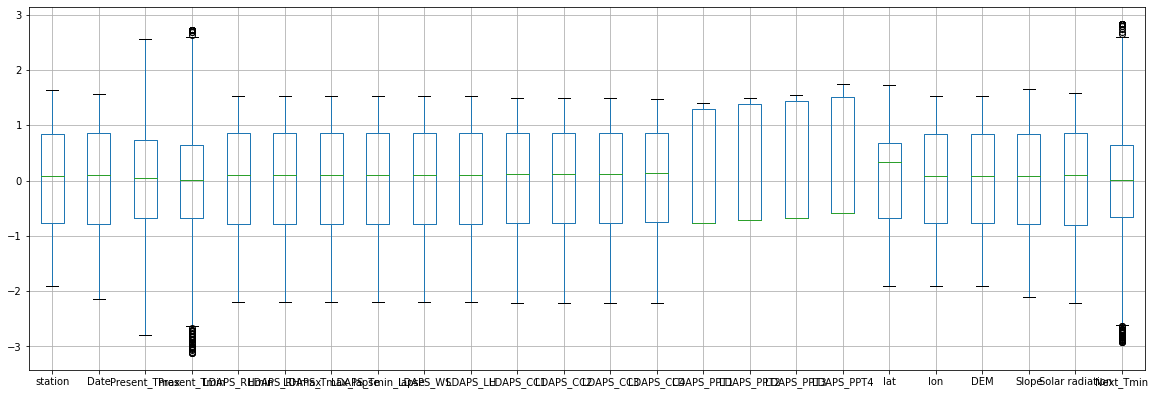

In [90]:
x.iloc[:,:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

finding best random_state

In [91]:
data.dtypes

station             int64
Date                int32
Present_Tmax        int64
Present_Tmin        int64
LDAPS_RHmin         int64
LDAPS_RHmax         int64
LDAPS_Tmax_lapse    int64
LDAPS_Tmin_lapse    int64
LDAPS_WS            int64
LDAPS_LH            int64
LDAPS_CC1           int64
LDAPS_CC2           int64
LDAPS_CC3           int64
LDAPS_CC4           int64
LDAPS_PPT1          int64
LDAPS_PPT2          int64
LDAPS_PPT3          int64
LDAPS_PPT4          int64
lat                 int64
lon                 int64
DEM                 int64
Slope               int64
Solar radiation     int64
Next_Tmax           int64
Next_Tmin           int64
dtype: object

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0

In [121]:
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1)
    

In [122]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred= LR.predict(x_test)
acc=accuracy_score(y_test,pred)
if acc>maxAccu:
        maxAccu=acc
        maxRs=1
print('best accuracy is',maxAccu,'on random_state',maxRs) 
           

best accuracy is 0.029658284977433915 on random_state 1


C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=30, random_state=1)

In [123]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred= LR.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.026120606256046435
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-def

In [124]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.027571751048049018
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.33      0.33      0.33         3
          15       0.00      0.00      0.00     

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New f

In [125]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.04272815220896485
[[ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.10      1.00      0.18         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.25      0.67      0.36         3
          15 

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New f

In [126]:
from sklearn.svm import SVC
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.027249274427603998
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00     

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OUR BEST MODEL IS RandomForestClassifier

# hyper parameter tuning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy']}

In [132]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [133]:
GCV.fit(x_train,y_train)

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [134]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [135]:
final_mod=RandomForestClassifier(criterion='gini', max_depth= 6)

In [136]:
final_mod.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [137]:
pred = final_mod.predict(x_train)

In [138]:
print(acc*100)

2.6120606256046437


In [139]:
import joblib
joblib.dump(final_mod,'finalmodle.pkl')

['finalmodle.pkl']